In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./sample_data/mnist_train_small.csv',header=None)
data = np.array(data)

In [2]:
print(data)
print(data.shape)

[[6 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
(20000, 785)


In [3]:
print(data[0,:])

[  6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  24  67  67
  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 131 252 252  66   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 159 250
 232  30  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  15 222 252 108   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 147
 252 183   5   0   0   0   0   0   0   0  20  89  8

In [4]:
x_train = data[:, 1:]
y_train = data[:, 0]
x_train = x_train.reshape(-1,28,28)

In [5]:
x_train.shape

(20000, 28, 28)

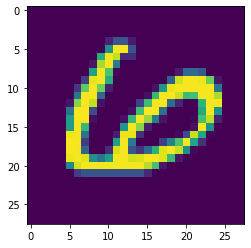

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:])

In [7]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [8]:
x_train = np.expand_dims(x_train, -1)
y_train = keras.utils.to_categorical(y_train)

In [10]:
model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size=3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(strides=2, padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.
              RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 24s 40ms/step - loss: 11.8141 - accuracy: 0.7050 - val_loss: 0.3426 - val_accuracy: 0.9332
Epoch 2/10
219/219 [==============================] - 8s 37ms/step - loss: 0.2074 - accuracy: 0.9502 - val_loss: 0.1518 - val_accuracy: 0.9617
Epoch 3/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0883 - accuracy: 0.9749 - val_loss: 0.1745 - val_accuracy: 0.9543
Epoch 4/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.1236 - val_accuracy: 0.9715
Epoch 5/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.1279 - val_accuracy: 0.9717
Epoch 6/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.1409 - val_accuracy: 0.9703
Epoch 7/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.1506 - val_accuracy: 0.97

In [12]:
data = pd.read_csv('./sample_data/mnist_test.csv',header=None)
data = np.array(data)

In [13]:
x_test = data[:,1:]
y_test = data[:,0]
x_test = x_test.reshape(-1,28,28,1)

In [14]:
o = model.predict(x_test)
o = np.argmax(o,-1)

In [15]:
sum(y_test == o)/len(y_test)

0.9747